# 🍔 McDonald's Nutrition Analysis (EDA)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/McDonald%27s_Golden_Arches.svg/1200px-McDonald%27s_Golden_Arches.svg.png" width="150" style="display: block; margin: 0 auto">

## 1. Introduction
In this project, we perform an **Exploratory Data Analysis (EDA)** on McDonald's menu nutritional dataset. With the rising awareness of diet and health, understanding what we eat is crucial.

**Objectives:**
1.  Identify the most caloric items on the menu.
2.  Analyze the distribution of menu categories.
3.  Examine cholesterol levels across different food categories.
4.  Visualize the correlation between different nutrients (Fat, Sugar, Protein, etc.).

**Tools used:** Python, Pandas, Matplotlib.

*Importing Required Libraries for this Notebook.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

In [2]:
df_main = pd.read_csv('menu.csv')

df = df_main.copy()

df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


## 2. Data Preparation 

In [3]:
# Shape of the dataset
df.shape

(260, 24)

In [4]:
# Getting list of all columns present in the dataframe
df.columns.to_list()

['Category',
 'Item',
 'Serving Size',
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

In [5]:
# Checking for the duplicated value
duplicate_count = df.duplicated().sum() 

if duplicate_count > 0:
    df = df.drop_duplicates()

print(duplicate_count)

0


In [6]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [7]:
# Statistical measurement of the dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category,260,9,Coffee & Tea,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,260,260,McFlurry with Reese's Peanut Butter Cups (Snack),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Serving Size,260,107,16 fl oz cup,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calories,260.0,NaN,NaN,NaN,368.269231,240.269886,0.0,210.0,340.0,500.0,1880.0
Calories from Fat,260.0,NaN,NaN,NaN,127.096154,127.875914,0.0,20.0,100.0,200.0,1060.0
Total Fat,260.0,NaN,NaN,NaN,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,NaN,NaN,NaN,21.815385,21.885199,0.0,3.75,17.0,35.0,182.0
Saturated Fat,260.0,NaN,NaN,NaN,6.007692,5.321873,0.0,1.0,5.0,10.0,20.0
Saturated Fat (% Daily Value),260.0,NaN,NaN,NaN,29.965385,26.639209,0.0,4.75,24.0,48.0,102.0
Trans Fat,260.0,NaN,NaN,NaN,0.203846,0.429133,0.0,0.0,0.0,0.0,2.5


In [8]:
# Checking for any missing value

missing = df.isna().sum().sort_values(ascending=False) 

missing

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [9]:
# Count and sort unique values per column
df.nunique().sort_values()

Trans Fat                          5
Dietary Fiber                      8
Category                           9
Iron (% Daily Value)              12
Calcium (% Daily Value)           16
Vitamin C (% Daily Value)         17
Vitamin A (% Daily Value)         19
Dietary Fiber (% Daily Value)     24
Saturated Fat                     26
Cholesterol                       35
Carbohydrates (% Daily Value)     40
Protein                           42
Calories from Fat                 48
Cholesterol (% Daily Value)       48
Total Fat                         52
Total Fat (% Daily Value)         63
Sodium (% Daily Value)            65
Saturated Fat (% Daily Value)     74
Calories                          78
Sugars                            83
Carbohydrates                     84
Serving Size                     107
Sodium                           111
Item                             260
dtype: int64

## 3. Cleaning
The `Serving Size` column contains mixed data (e.g., "4.8 oz (136 g)"). We need to extract the weight in **grams** to perform numerical analysis.

In [10]:
def get_grams_no_regex(value):
    if ' g)' in value:
        parts = value.split('(')
        last_part = parts[-1] 
        number_part = last_part.replace(' g)', '')
        
        return float(number_part)
    return None
 
df['Serving Size (g)'] = df['Serving Size'].apply(get_grams_no_regex)

df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size (g)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,136.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,135.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,111.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,161.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,161.0


## 4. Visualization

### 4.1. The "Calorie Bomb" Alert 🚨
First, we want to identify which items contribute the most to daily calorie intake. We filtered items containing **more than 800 calories**.

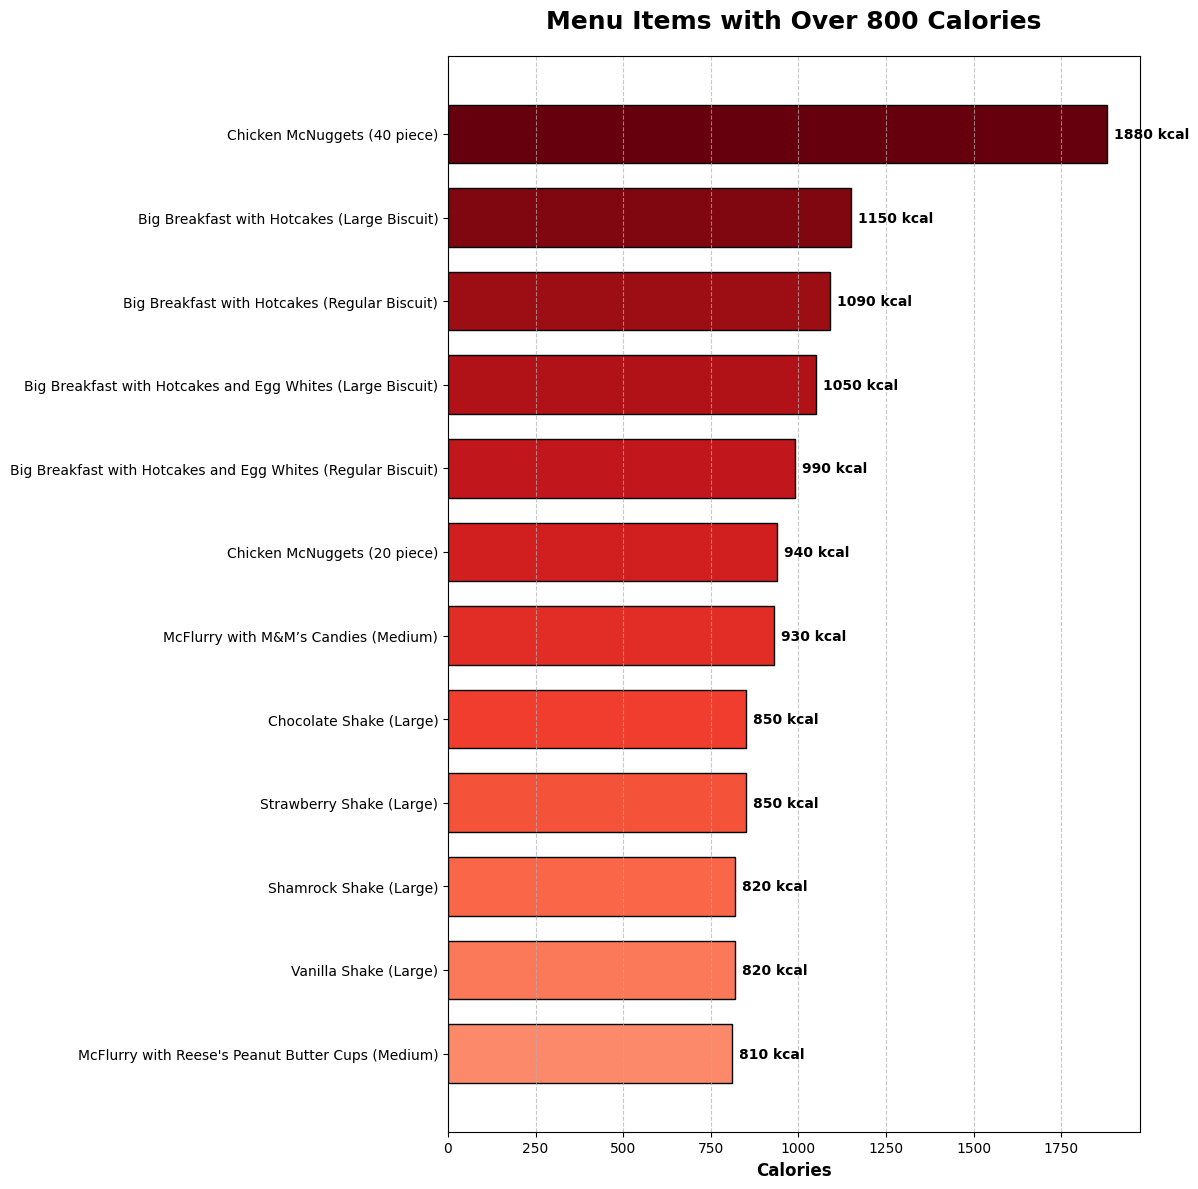

In [11]:
high_cal = df[df['Calories'] > 800].sort_values('Calories', ascending=True)

fig, ax = plt.subplots(figsize=(12, 12))

# Create gradient colors based on calorie count
colors = plt.cm.Reds(np.linspace(0.4, 1, len(high_cal)))

bars = ax.barh(high_cal['Item'], high_cal['Calories'], color=colors, edgecolor='black', height=0.7)

# Adding data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 20, 
            bar.get_y() + bar.get_height()/2, 
            f'{int(width)} kcal', 
            va='center', fontweight='bold', color='black', fontsize=10)

ax.set_title('Menu Items with Over 800 Calories', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Calories', fontsize=12, fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observation:**
- The **Chicken McNuggets (40 piece)** is the highest calorie item (1880 kcal).
- Most high-calorie items belong to the **Breakfast** category (Big Breakfasts).

---

### 4.2. Menu Category Distribution
What does McDonald's mainly sell? Let's look at the distribution of items across different categories.

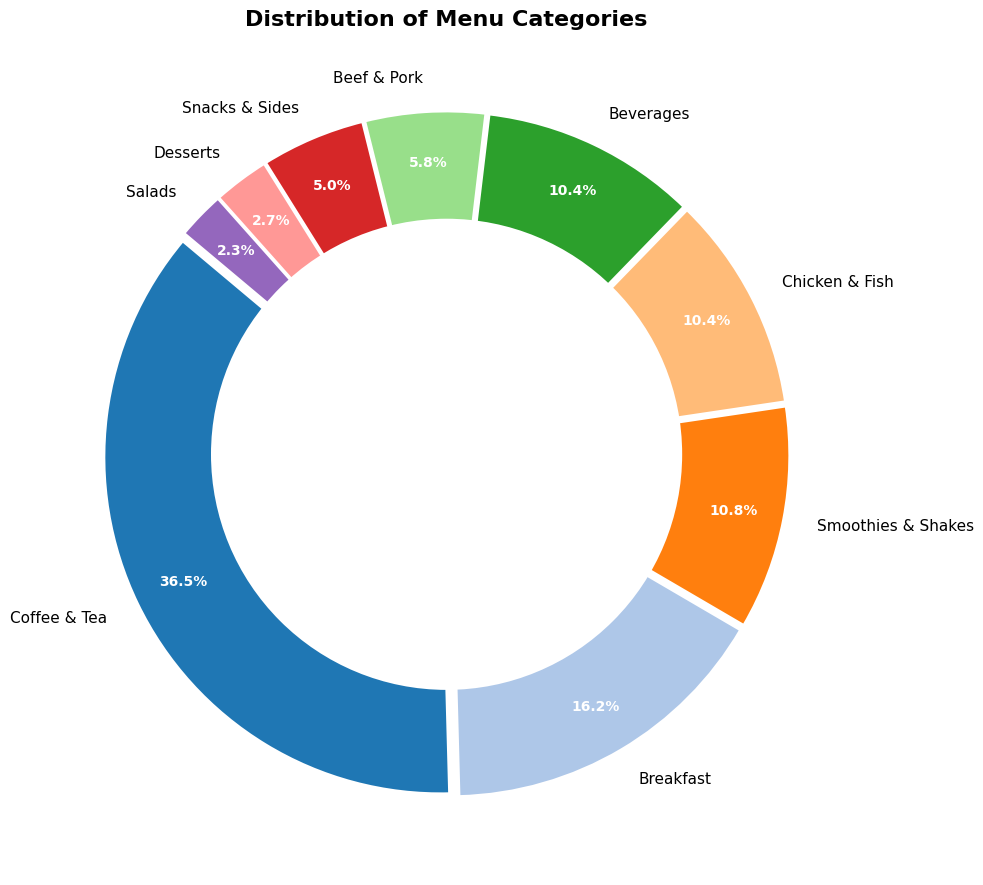

In [12]:
category_counts = df['Category'].value_counts()

fig, ax = plt.subplots(figsize=(10, 10))

# Color Palette for Pie Chart
colors = plt.get_cmap('tab20').colors

# Plot Pie Chart
wedges, texts, autotexts = ax.pie(category_counts, 
                                  labels=category_counts.index, 
                                  autopct='%1.1f%%', 
                                  startangle=140, 
                                  colors=colors, 
                                  pctdistance=0.85,
                                  explode=[0.02]*len(category_counts), # Small separation
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Customize Text
plt.setp(texts, size=11)
plt.setp(autotexts, size=10, weight="bold", color="white")

# Draw Circle to make it a Donut Chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Distribution of Menu Categories', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

**Observation:**
- **Coffee & Tea** is the largest category (36.5%), followed by **Breakfast** (16.2%).
- Salads make up the smallest portion of the menu (2.3%).

---

### 4.3. Cholesterol Analysis by Category
Which category is the least heart-friendly? We calculate the average cholesterol per category.

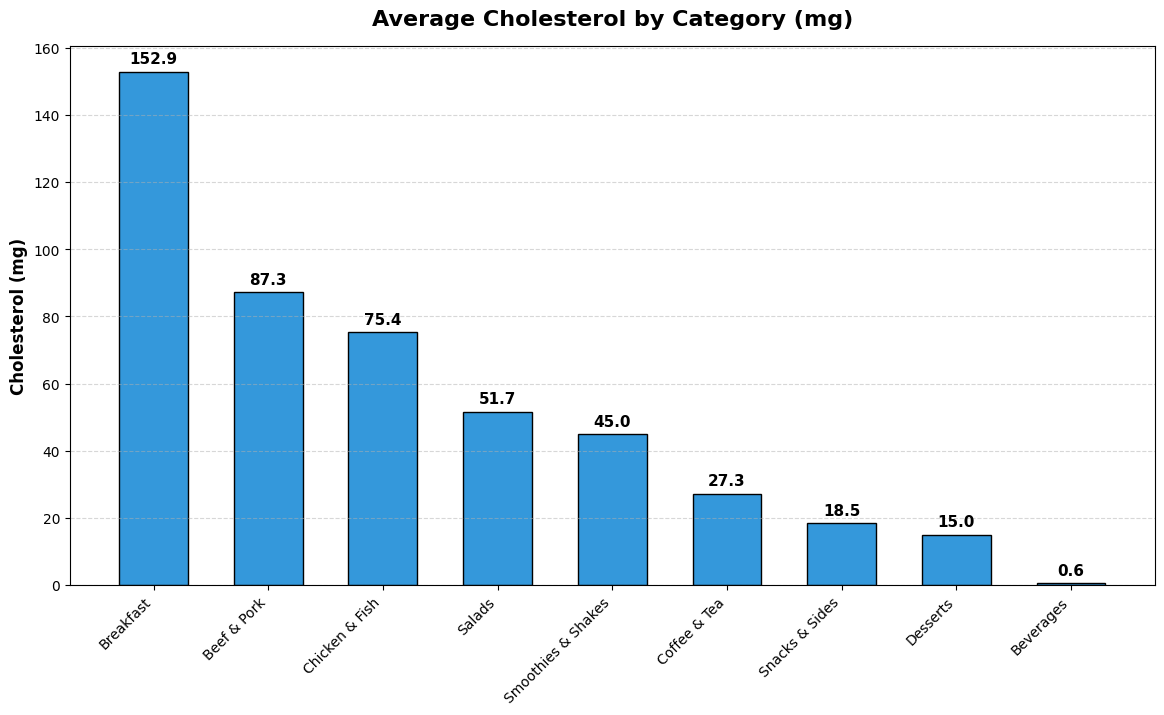

In [13]:
avg_cholesterol = df.groupby('Category')['Cholesterol'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(14, 7))

# Plot Vertical Bar Chart
bars = ax.bar(avg_cholesterol.index, avg_cholesterol.values, color='#3498db', edgecolor='black', width=0.6)

ax.set_title('Average Cholesterol by Category (mg)', fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('Cholesterol (mg)', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation=45, ha='right')

# Add Labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1.5,
            f'{height:.1f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.show()

**Observation:**
- **Breakfast** items have significantly higher cholesterol (avg 152.8 mg) compared to other categories, likely due to eggs and sausages.
- **Beverages** have the lowest cholesterol (almost 0).

---

### 4.4. Nutritional Correlation Matrix
How are different nutrients related? For example, does higher fat always mean higher calories?

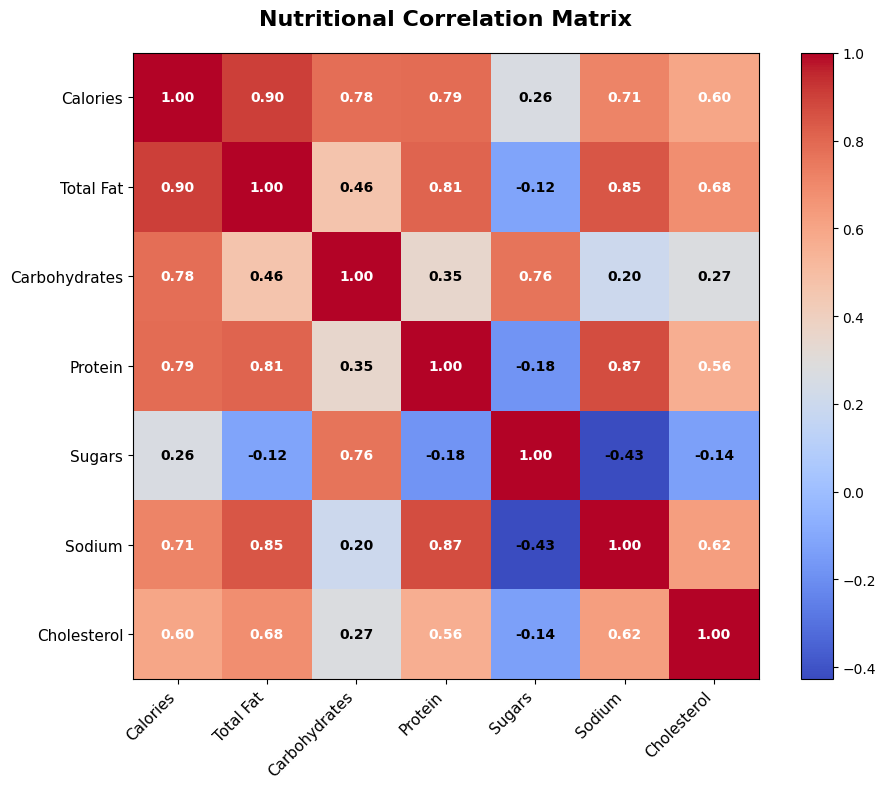

In [14]:
numeric_cols = ['Calories', 'Total Fat', 'Carbohydrates', 'Protein', 'Sugars', 'Sodium', 'Cholesterol']
corr_data = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.imshow(corr_data, cmap='coolwarm', interpolation='nearest')

# Add Colorbar
cbar = fig.colorbar(cax)

# Set Ticks
ax.set_xticks(np.arange(len(numeric_cols)))
ax.set_yticks(np.arange(len(numeric_cols)))

# Set Labels
ax.set_xticklabels(numeric_cols, rotation=45, ha="right", fontsize=11)
ax.set_yticklabels(numeric_cols, fontsize=11)

# Loop over data dimensions and create text annotations.
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        val = corr_data.iloc[i, j]
        color = "white" if abs(val) > 0.5 else "black"
        ax.text(j, i, f"{val:.2f}", ha="center", va="center", color=color, fontweight='bold')

ax.set_title("Nutritional Correlation Matrix", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 5. Conclusion & Key Takeaways

1.  **Calories:** The menu has some extremely high-calorie items, particularly in the Breakfast section and large Chicken McNuggets buckets.
2.  **Menu Mix:** McDonald's focuses heavily on Coffee & Tea and Breakfast, attempting to capture the morning crowd.
3.  **Health Implications:** - **Breakfast** is the category with the highest Cholesterol levels.
    - **Protein** and **Calories** are highly correlated ($0.79$), but **Total Fat** and **Calories** have an even stronger correlation ($0.90$).
    - **Sugar** is largely independent of Protein and Fat but correlates with Carbohydrates.

This analysis helps consumers make informed decisions when choosing their meals based on their dietary goals (e.g., low cholesterol or low sugar).